In [106]:
import tellurium as te; te.setDefaultPlottingEngine('matplotlib')
import matplotlib.pyplot as plt
%matplotlib inline

In [142]:
model = '''
#functions # q: 1 fuer act, 0 fuer rep

#allgemeine funktion fuer act oder rep je nachdem ob q = 1 oder q = 0
function regfunc(U ,K ,H, q)
   ( (U/K)^H * q + 1*(1-q)) / (1 + (U/K)^H )
end

#allgemeine GateAND funktion
function gateand(U1, K1, U2, K2, H, q1, q2)
    ( regfunc(U1, K1, H, q1) ) * ( regfunc(U2, K2, H, q2))
end

#allgemeine GateOR funktion fuer act oder rep je nachdem ob q = 1 oder q = 0
function gar(U, Ku, V, Kv, H, q)
    ( (U/Ku)^H * q + 1 * (1-q) ) / ( 1+ (U/Ku)^H + (V/Kv)^H )
end

#allgemeine GateOR funktion
function gateor(U1, Ku, V1, Kv, H, q1, q2)
    gar(U1, Ku, V1, Kv, H, q1) + gar(V1, Kv, U1, Ku, H, q2)
end

X = 1
Z = 0
Y = 0


Sx = 0
Sy = 1
By = 0
Bz = 0
by = 1
bz = 1
ay = 1
az = 1

X1 := Sx * X
Y1 := Sy * Y

H = 2;

Kxy = 0.1
Kxz = 0.1
Kyz = 0.5

#PFEILE. 1 fuer act, 0 fuer rep. P1: XnachY , P2: XnachZ, P3: YnachZ
P1 = 1
P2 = 1
P3 = 1



#normz = (Bz + bz * regfunc(X1, Kxy, H, P1)) / az


        
        
        
#ODE


Y'= ( By + by * regfunc(X1, Kxy, H, P1) - ay * Y ) 
Z'= ( Bz + bz * gateand(X1, Kxz, Y1, Kyz, H, P2, P3) - az * Z ) 
#Z' = Bz + bz * gateor(X1, Kxz, Y1, Kyz, H, P2, P3) - az * Z

#Z2 = Z' / normz

#zweite kurve

KKyz= 5
XX=1
YY=0
ZZ=0
XX1:= Sx * XX
YY1:= Sy * YY
YY'= By + by * regfunc(XX1, Kxy, H, P1) - ay * YY
ZZ'= Bz + bz * gateand(XX1, Kxz, Y1, KKyz, H, P2, P3) - az * ZZ
#ZZ' = Bz + bz * gateor(XX1, Kxz, Y1, KKyz, H, P2, P3) - az * ZZ'


#simple regulation

SSy=1
SSx=1
S=1
T=0
SKxz=1
SKyz=1
SKyz=Kyz
SKxy=Kxy
SX1=1
SY1=1
SX1:= SSx * S
SY1:= SSy * T
S' = 0
T' = Bz + bz * gateand(SX1, SKxz, SY1, SKyz, H, P2, P3) - az * T


E1: at (time>0): Sx = 0;
E2: at (time>1): Sx = 1;
E3: at (time>4): Sx = 0;

'''


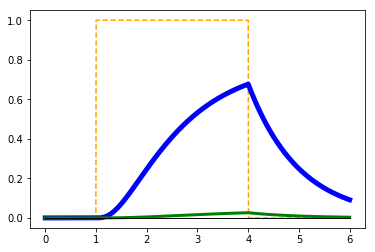

In [145]:
# COHERENT 1 AND

start = 0
end = 6
steps = 1000



r=te.loada(model)

plt.figure(1)
r.timeCourseSelections=['time', 'X', 'Y', 'Z', 'Sx', 'Sy', 'S', 'T', 'YY', 'ZZ', 'SSx', 'SSy']
res = r.simulate(start, end, steps)



r['P1']=1
r['P2']=1
r['P3']=1

r['Kxy']=0.1
r['Kyz']=0.5
r['Kxz']=0.1
r['KKyz']=5

#print(np.amax(res))

plt.plot(res['time'], res['Sx'],'--',color='orange')
plt.plot(res['time'], res['Z'], linewidth=5, color='blue')
plt.plot(res['time'], res['ZZ'], linewidth=3, color='green')
plt.plot(res['time'], res['T'], linewidth=1, color='black')



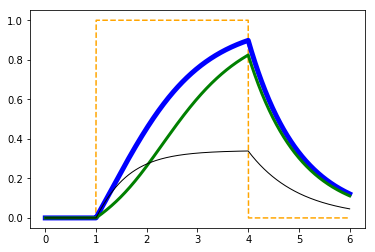

In [109]:
# COHERENT 4 AND

start = 0
end = 6
steps = 1000

r=te.loada(model)
r.reset()
r['P1']=0
r['P2']=1
r['P3']=0

r['Kxy']=0.1
r['Kyz']=0.6
r['Kxz']=0.1
r['KKyz']=0.3

plt.figure(2)
r.timeCourseSelections=['time', 'X', 'Y', 'Z', 'Sx', 'Sy', 'S', 'T', 'YY', 'ZZ']
res = r.simulate(start, end, steps)
plt.plot(res['time'], res['Sx'],'--',color='orange')
plt.plot(res['time'], res['Z'], linewidth=5, color='blue')
plt.plot(res['time'], res['ZZ'], linewidth=3, color='green')
plt.plot(res['time'], res['T'], linewidth=1, color='black')


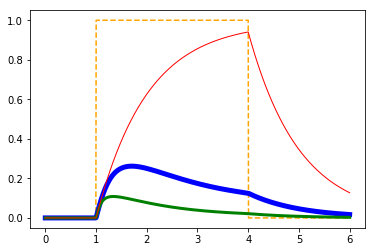

In [158]:
# INCOHERENT 1 AND Sy=1

start = 0
end = 6
steps = 1000

r=te.loada(model)

r['P1']=1
r['P2']=1
r['P3']=0

r['Kxy']=0.1
r['Kyz']=0.3
r['Kxz']=0.1
r['KKyz']=0.1



plt.figure(3)
r.timeCourseSelections=['time', 'X', 'Y', 'Z', 'Sx', 'Sy', 'S', 'T', 'YY', 'ZZ']
res = r.simulate(start, end, steps)
plt.plot(res['time'], res['Sx'],'--',color='orange')
plt.plot(res['time'], res['Z'], linewidth=5, color='blue')
plt.plot(res['time'], res['ZZ'], linewidth=3, color='green')
#plt.plot(res['time'], res['T'], linewidth=1, color='black')

r.reset()
r['Sy']=0

plt.figure(3)
r.timeCourseSelections=['time', 'X', 'Y', 'Z', 'Sx', 'Sy', 'S', 'T', 'YY', 'ZZ']
res = r.simulate(start, end, steps)
plt.plot(res['time'], res['Z'], linewidth=1, color='red')



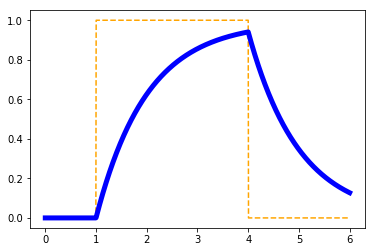

In [129]:
# INCOHERENT 1 AND Sy=0

start = 0
end = 6
steps = 1000

r=te.loada(model)

r['P1']=1
r['P2']=1
r['P3']=0

r['Kxy']=0.1
r['Kyz']=0.3
r['Kxz']=0.1
r['KKyz']=0.1

r['Sy'] = 0

plt.figure(3)
r.timeCourseSelections=['time', 'X', 'Y', 'Z', 'Sx', 'Sy', 'S', 'T', 'YY', 'ZZ']
res = r.simulate(start, end, steps)
plt.plot(res['time'], res['Sx'],'--',color='orange')
plt.plot(res['time'], res['Z'], linewidth=5, color='blue')
#plt.plot(res['time'], res['ZZ'], linewidth=3, color='green')
#plt.plot(res['time'], res['T'], linewidth=1, color='black')


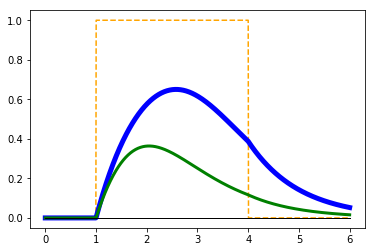

In [111]:
# INCOHERENT 4 AND Sy=1

start = 0
end = 6
steps = 1000

r=te.loada(model)

r['P1']=0
r['P2']=1
r['P3']=1

r['Kxy']=0.1
r['Kyz']= 0.1
r['Kxz']=0.1
r['KKyz']=0.3
r['SKyz']=1
#drittes KKyz = {0.1, 1, 0.3} !!!!!!!!!!!!!!!!!!!!!!!!

plt.figure(4)
r.timeCourseSelections=['time', 'X', 'Y', 'Z', 'Sx', 'Sy', 'S', 'T', 'YY', 'ZZ']
res = r.simulate(start, end, steps)
plt.plot(res['time'], res['Sx'],'--',color='orange')
plt.plot(res['time'], res['Z'], linewidth=5, color='blue')
plt.plot(res['time'], res['ZZ'], linewidth=3, color='green')
plt.plot(res['time'], res['T'], linewidth=1, color='black')


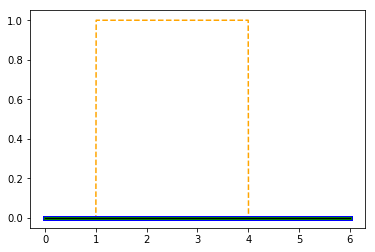

In [146]:
# INCOHERENT 4 AND Sy=0

start = 0
end = 6
steps = 1000

r=te.loada(model)

r['P1']=0
r['P2']=1
r['P3']=1

r['Kxy']=0.1
r['Kyz']= 0.1
r['Kxz']=0.1
r['KKyz']=0.3
r['SKyz']=1
#drittes KKyz = {0.1, 1, 0.3} !!!!!!!!!!!!!!!!!!!!!!!!

r['Sy'] = 0

plt.figure(4)
r.timeCourseSelections=['time', 'X', 'Y', 'Z', 'Sx', 'Sy', 'S', 'T', 'YY', 'ZZ']
res = r.simulate(start, end, steps)
plt.plot(res['time'], res['Sx'],'--',color='orange')
plt.plot(res['time'], res['Z'], linewidth=5, color='blue')
plt.plot(res['time'], res['ZZ'], linewidth=3, color='green')
plt.plot(res['time'], res['T'], linewidth=1, color='black')


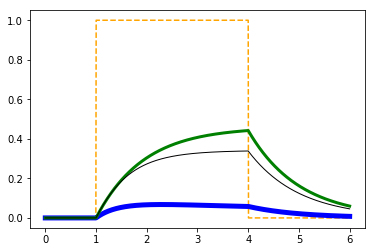

In [117]:
# INCOHERENT 1 AND WITH BASAL

start = 0
end = 6
steps = 1000

r=te.loada(model)

r['P1']=1
r['P2']=1
r['P3']=0

r['Kxy']=1
r['Kyz']= 0.5
r['Kxz']=1
r['By']= 0.5
#r['Y'] = 1



plt.figure(5)
r.timeCourseSelections=['time', 'X', 'Y', 'Z', 'Sx', 'Sy', 'S', 'T', 'YY', 'ZZ']
res = r.simulate(start, end, steps)
plt.plot(res['time'], res['Sx'],'--',color='orange')
plt.plot(res['time'], res['Z'], linewidth=5, color='blue')
plt.plot(res['time'], res['ZZ'], linewidth=3, color='green')
plt.plot(res['time'], res['T'], linewidth=1, color='black')


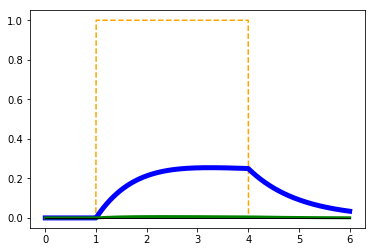

In [113]:
# INCOHERENT 1 AND WITH BASAL

start = 0
end = 6
steps = 1000

r=te.loada(model)

r['P1']=0
r['P2']=1
r['P3']=1

r['Kxy']=0.1
r['Kyz']= 0.5
r['Kxz']=1
r['By']=0.45
#r['Y'] = 1



plt.figure(6)
r.timeCourseSelections=['time', 'X', 'Y', 'Z', 'Sx', 'Sy', 'S', 'T', 'YY', 'ZZ']
res = r.simulate(start, end, steps)
plt.plot(res['time'], res['Sx'],'--',color='orange')
plt.plot(res['time'], res['Z'], linewidth=5, color='blue')
plt.plot(res['time'], res['ZZ'], linewidth=3, color='green')
plt.plot(res['time'], res['T'], linewidth=1, color='black')

In [114]:
modelOR = '''
#functions # q: 1 fuer act, 0 fuer rep

#allgemeine funktion fuer act oder rep je nachdem ob q = 1 oder q = 0
function regfunc(U ,K ,H, q)
   ( (U/K)^H * q + 1*(1-q)) / (1 + (U/K)^H )
end

#allgemeine GateAND funktion
function gateand(U1, K1, U2, K2, H, q1, q2)
    ( regfunc(U1, K1, H, q1) ) * ( regfunc(U2, K2, H, q2))
end

#allgemeine GateOR funktion fuer act oder rep je nachdem ob q = 1 oder q = 0
function gar(U, Ku, V, Kv, H, q)
    ( (U/Ku)^H * q + 1 * (1-q) ) / ( 1+ (U/Ku)^H + (V/Kv)^H )
end

#allgemeine GateOR funktion
function gateor(U1, Ku, V1, Kv, H, q1, q2)
    gar(U1, Ku, V1, Kv, H, q1) + gar(V1, Kv, U1, Ku, H, q2)
end

X = 1
Z = 0
Y = 0


Sx = 0
Sy = 1
By = 0
Bz = 0
by = 1
bz = 1
ay = 1
az = 1

X1 := Sx * X
Y1 := Sy * Y

H = 2;

Kxy = 0.1
Kxz = 0.1
Kyz = 0.5

#PFEILE. 1 fuer act, 0 fuer rep. P1: XnachY , P2: XnachZ, P3: YnachZ
P1 = 1
P2 = 1
P3 = 1



#ARRAYS


        
        
        
#ODE


Y'= ( By + by * regfunc(X1, Kxy, H, P1) - ay * Y ) 
#Z'= ( Bz + bz * gateand(X1, Kxz, Y1, Kyz, H, P2, P3) - az * Z ) 
Z' = Bz + bz * gateor(X1, Kxz, Y1, Kyz, H, P2, P3) - az * Z

#zweite kurve

KKyz= 5
XX=1
YY=0
ZZ=0
XX1:= Sx * XX
YY1:= Sy * YY
YY'= By + by * regfunc(XX1, Kxy, H, P1) - ay * YY
ZZ'= Bz + bz * gateand(XX1, Kxz, Y1, KKyz, H, P2, P3) - az * ZZ
#ZZ' = Bz + bz * gateor(XX1, Kxz, Y1, KKyz, H, P2, P3) - az * ZZ'


#simple regulation

S=1
T=0
SKxz=1
SKyz=1
SKyz=Kyz
SX1=1
SY1=1
SX1:= Sx * S
SY1:= Sy * T
S' = 0
#T' = Bz + bz * gateand(SX1, SKxz, SY1, SKyz, H, P2, P3) - az * T
T' = Bz + bz * gateor(SX1, SKxz, SY1, SKyz, H, P2, P3) - az * T


E1: at (time>0): Sx = 0;
E2: at (time>1): Sx = 1;
E3: at (time>4): Sx = 0;

'''


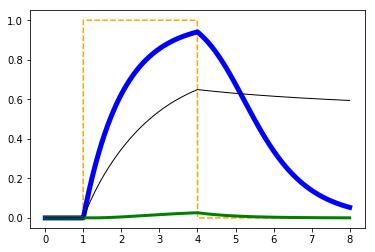

In [116]:
# COHERENT 1 OR

start = 0
end = 8
steps = 1000


r=te.loada(modelOR)

plt.figure(1)
r.timeCourseSelections=['time', 'X', 'Y', 'Z', 'Sx', 'Sy', 'S', 'T', 'YY', 'ZZ']
res = r.simulate(start, end, steps)


r['P1']=1
r['P2']=1
r['P3']=1

r['Kxy']=0.5
r['Kyz']=0.7
r['Kxz']=0.1
r['KKyz']=0.3

#print(np.amax(res))

plt.plot(res['time'], res['Sx'],'--',color='orange')
plt.plot(res['time'], res['Z'], linewidth=5, color='blue')
plt.plot(res['time'], res['ZZ'], linewidth=3, color='green')
plt.plot(res['time'], res['T'], linewidth=1, color='black')